In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Install YOLO Model Package

In [1]:
import os

!pip install ultralytics

from IPython import display
display.clear_output()

from ultralytics import YOLO
from IPython.display import display, Image


### Testing the yolo model

In [4]:

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/bin/bash: yolo: command not found


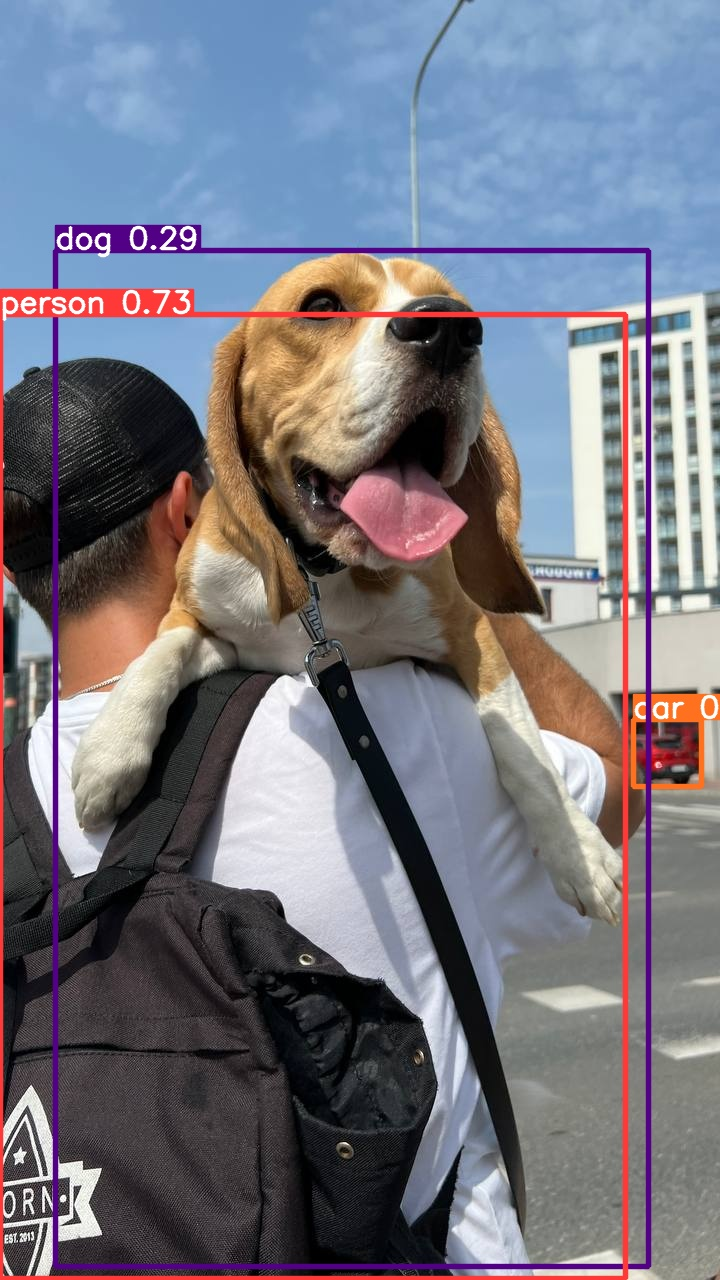

In [ ]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### Prepare Training Data Set for F1 tracking


1.   Use data set from roboflow
2.   Install roboflow package
3.   Download dataset



In [ ]:

!mkdir /f1-data
!curl -L "https://universe.roboflow.com/ds/iRTiWQRFmB?key=Ek6JuNIWET" --output /f1-data/roboflow.zip
!unzip /f1-data/roboflow.zip
!rm /f1-data/roboflow.zip


mkdir: cannot create directory ‘/f1-data’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2080      0 --:--:-- --:--:-- --:--:--  2080
100 16.5M  100 16.5M    0     0  12.7M      0  0:00:01  0:00:01 --:--:-- 80.2M
Archive:  /f1-data/roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
 extracting: test/images/ferrari28_jpg.rf.cde8a07684e8a8547a2162189123ce9e.jpg  
 extracting: test/images/ferrari32_jpg.rf.8b9c203ff184ad4972aff9917ace0e25.jpg  
 extracting: test/images/ferrari36_jpg.rf.343c4b59769a97a417c78e3f4d19648a.jpg  
 extracting: test/images/ferrari41_jpg.rf.8c34c835356eb8c15a6763b12306a8b1.jpg  
 extracting: test/images/ferrari43_jpg.rf.7b7a6f59fe2cd034fcc8fbadab5d63e7.jpg  
 extractin

### Train the YOLO model with f1-data set


1.   data.yaml contains description info of training set
2.   use annotation/label info of training set
3.   adjust the epochs accordingly



In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=800

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

### Testing the model with image


1.   The trained model is under runs->detect->train->weights
2.   Make sure to use the model trained above



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  103k  100  103k    0     0   467k      0 --:--:-- --:--:-- --:--:--  466k
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/f1.jpg: 544x800 1 ferrari, 2 redbulls, 119.0ms
Speed: 4.9ms preprocess, 119.0ms inference, 1985.1ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


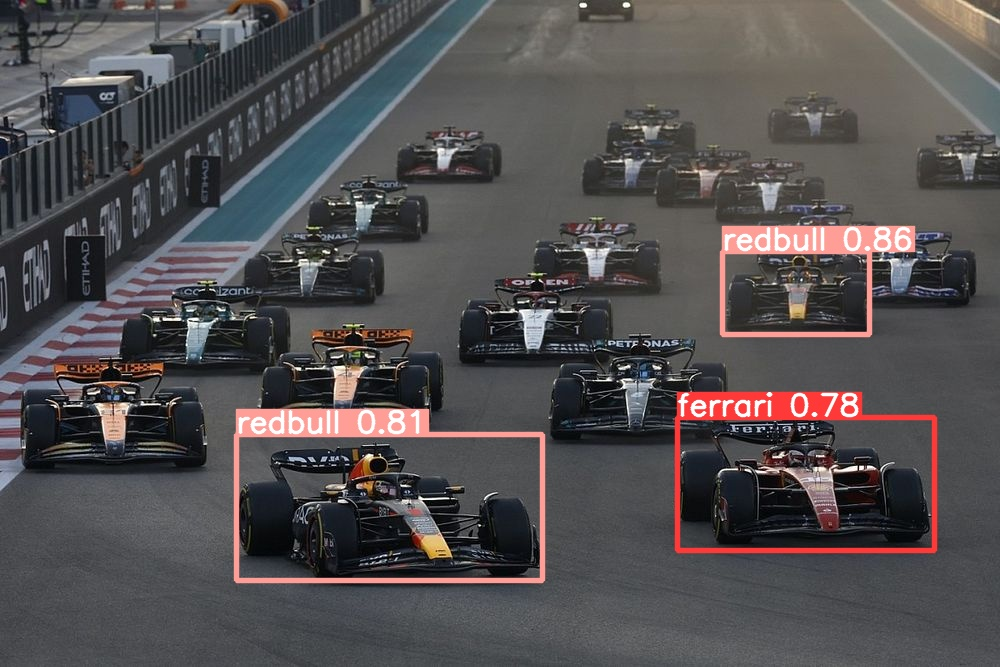

In [ ]:
!curl -o f1.jpg https://cdn-1.motorsport.com/images/amp/6xEgLX80/s1000/max-verstappen-red-bull-racing.jpg
!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.25 source='f1.jpg'
Image(filename='./runs/detect/predict2/f1.jpg', height=600)

### Prepare video for tracking

1.   The video is located in the google folder
2.   Download the video with gdown command
3.   Allow sometimes for the video to showup in the directory




In [ ]:
# import glob
# from IPython.display import Image, display
# for image_path in glob.glob(f'')
# !git clone https://github.com/niconielsen32/ObjectTracking.git
# !pip install filterpy==1.4.5
# !pip install scikit-image==0.17.2
# !pip install lap==0.4.0
# !pip install ffmpeg-python
# !pip install seaborn
# !pip install Pillow
# !pip install numpy
# from google.colab import drive
# drive.mount('/content/drive/EECS442/Project')
!gdown --id 1alJc4qbMON5gN5Yc3P9feKlJuJslNXh0
# import sys
# import os
# from google.colab import files
# #import centernet


# # sys.path.append("/content/ObjectTracking")
# from sort import Sort
# from lib import VisTrack, show_video, create_video

# import numpy as np
# import PIL.Image
# import cv2
# import matplotlib.pyplot as plt
# from tqdm.auto import tqdm
# import shutil




/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1alJc4qbMON5gN5Yc3P9feKlJuJslNXh0
From (redirected): https://drive.google.com/uc?id=1alJc4qbMON5gN5Yc3P9feKlJuJslNXh0&confirm=t&uuid=7af60817-9bca-4ad5-837e-dead9ad6bb04
To: /content/f1.mp4
100% 143M/143M [00:01<00:00, 128MB/s]


### Verify the download video

In [ ]:
# TODO:

### Separate videos into each frame


In [ ]:
import cv2
import shutil
import matplotlib.pyplot as plt

video_file = "f1.mp4"
vidcap = cv2.VideoCapture(video_file)
fps = vidcap.get(cv2.CAP_PROP_FPS)
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video length length: {length} frames")

num_frames = 0

folder_out = "frames"
if os.path.exists(folder_out):
    shutil.rmtree(folder_out)

os.makedirs(folder_out)
while True:
    ret, frame = vidcap.read()
    if not ret:
        break
    if num_frames == 500:
      break
    print(f"processing frame {num_frames:03d}")
    num_frames += 1
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imsave(f'./frames/frame_{num_frames:03d}.png', frame_rgb)

print("Finish processing!!!")

Video length length: 10499 frames
processing frame 000
processing frame 001
processing frame 002
processing frame 003
processing frame 004
processing frame 005
processing frame 006
processing frame 007
processing frame 008
processing frame 009
processing frame 010
processing frame 011
processing frame 012
processing frame 013
processing frame 014
processing frame 015
processing frame 016
processing frame 017
processing frame 018
processing frame 019
processing frame 020
processing frame 021
processing frame 022
processing frame 023
processing frame 024
processing frame 025
processing frame 026
processing frame 027
processing frame 028
processing frame 029
processing frame 030
processing frame 031
processing frame 032
processing frame 033
processing frame 034
processing frame 035
processing frame 036
processing frame 037
processing frame 038
processing frame 039
processing frame 040
processing frame 041
processing frame 042
processing frame 043
processing frame 044
processing frame 045


### Apply model to each frames for object tracking

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.25 source='frames'

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/500 /content/frames/frame_001.png: 480x800 (no detections), 87.4ms
image 2/500 /content/frames/frame_002.png: 480x800 (no detections), 16.5ms
image 3/500 /content/frames/frame_003.png: 480x800 (no detections), 15.7ms
image 4/500 /content/frames/frame_004.png: 480x800 (no detections), 15.7ms
image 5/500 /content/frames/frame_005.png: 480x800 (no detections), 15.7ms
image 6/500 /content/frames/frame_006.png: 480x800 (no detections), 15.7ms
image 7/500 /content/frames/frame_007.png: 480x800 (no detections), 15.7ms
image 8/500 /content/frames/frame_008.png: 480x800 (no detections), 15.7ms
image 9/500 /content/frames/frame_009.png: 480x800 (no detections), 15.7ms
image 10/500 /content/frames/frame_010.png: 480x800 (no detections), 15.7ms
image 11/500 /content/frames/frame_011.png: 480x800 (no detections), 15.8ms
image

### Combine freams to videos


In [ ]:
!pip install ffmpeg-python
import ffmpeg
import subprocess
from IPython.display import HTML
import PIL.Image
from base64 import b64encode
import seaborn as sns
from google.colab import files

import numpy as np
import os

def show_video(video_path, video_width = "fill"):
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

def create_video(frames_patten='Track/%03d.png', video_file = 'movie.mp4', framerate=25):
  if os.path.exists(video_file):
      os.remove(video_file)
  ffmpeg.input(frames_patten, framerate=framerate).output(video_file).run()


input_pattern = './runs/detect/predict3/frame_%03d.png'
output_video_file = 'output_video.mp4'
fps = 30
track_video_file = 'tracking.mp4'
create_video(frames_patten=input_pattern, video_file = track_video_file, framerate=fps)
files.download(track_video_file)
show_video(track_video_file)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# test the accuraycy of model
#!yolo val model=./runs/detect/train/weights/best.pt data=data.yaml split=test!
!yolo task=detect mode=val model=./runs/detect/train/weights/best.pt data=data.yaml conf=0.5 split=test

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 17. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.43s/it]
                   all         10         17      0.981      0.875      0.926       0.65
               ferrari         10          9          1          1      0.995      0.649
               redbull         10          8      0.962       0.75      0.856      0.651
Speed: 0.4ms preprocess, 23.3ms inference, 0.0ms loss, 218.5ms p

In [ ]:
import math
!pip install cvzone
import cvzone
import matplotlib.pyplot as plt
!git clone https://github.com/abewley/sort.git
from sort.sort import *

fatal: destination path 'sort' already exists and is not an empty directory.


ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

In [ ]:


model = YOLO("./runs/detect/train2/weights/best.pt")
cap = cv2.VideoCapture("f1.mp4")
tracker = Sort(max_age=20, min_hits=3, iou_threshold=0.3)
!mkdir improve

i = 0
while True:
  success, img = cap.read()
  result = model(img, stream=True)
  for r in result:
    boxes = r.boxes
    for box in boxes:
      conf = math.ceil(box.conf[0] * 100) / 100

      print("conf: ", conf)
      x1, y1,x2,y2 = box.xyxy[0]
      x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

      bbox = x1, y1, x2, y2
      w, h = x2 - x1, y2 - y1


      cls = int(box.cls[0])
      print("cls: ", cls)
      cvzone.putTextRect(img, f'{cls} {conf}', max(35, y1), scale=0.75, thickness=1, offset=3)
      cvzone.cornerRect(img, (x1, y1, w, h), l=9)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    i += 1
    # Display the image using Matplotlib
    plt.imsave(f'./improve/{i:3d}.png', image_rgb)

    if cv2.waitKey(1) == ord('q'):
      break

Cloning into 'sort'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 208 (delta 2), reused 2 (delta 1), pack-reused 202
Receiving objects: 100% (208/208), 1.21 MiB | 13.87 MiB/s, done.
Resolving deltas: 100% (74/74), done.


NameError: name 'Sort' is not defined